# 1. CNN on MNIST data set.

## 1.1 Importing necessary Libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


## 1.2 Setting required parameters and Reading MNIST data set

In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

batch_size = 256
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y_train.shape)
print(y_train)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples
(60000,)
[5 0 4 ... 5 6 8]


## 1.3 Normalizing the data and converting output label into matrix form

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## 1.4 Plot a dynamic graph

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

#2. Training different models on MNIST data 

## 2.1 Model A.1 : Three Convolution layers with 3X3 filter size(without dropout and Batch Normalization)

In [13]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.summary()
print("------------------------------------------------")
model.add(Conv2D(32, (3, 3), activation='relu'))
model.summary()
print("------------------------------------------------")
model.add(Conv2D(64, (3, 3), activation='relu'))
model.summary()
print("------------------------------------------------")
model.add(MaxPooling2D(pool_size=(2, 2)))
model.summary()
print("------------------------------------------------")
model.add(Flatten())
model.summary()
print("------------------------------------------------")
model.add(Dense(64, activation='relu'))
model.summary()
print("------------------------------------------------")
model.add(Dense(num_classes, activation='softmax'))
model.summary()
print("------------------------------------------------")

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------
Model: "sequential_2"
____________________________________________

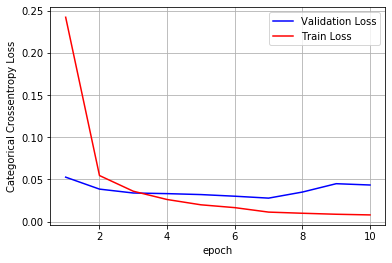

In [14]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoc
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 2.2 Model A.2 : Three Convolution layers with 3X3 filter size with dropout and batch normalization

In [26]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,padding = "same"))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
model.summary()
print("------------------------------------------------")

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
___

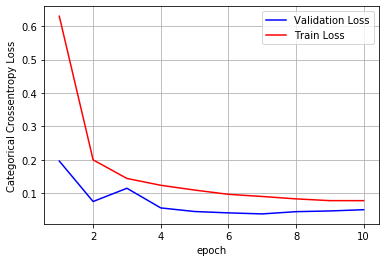

In [27]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoc
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 2.3 Model B : Five Convolution layers with 5X5 filter size + Dropout + Batch Normalization + Max Pooling

In [33]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,padding = "same"))
model.add(Conv2D(128, (5, 5), activation='relu',padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (5, 5), activation='relu',padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (5, 5), activation='relu',padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5), activation='relu',padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 128)       102528    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        204864    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 64)         

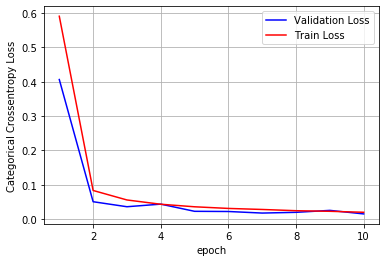

In [34]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoc
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 2.4 Model C : Seven Convolution layers with 7X7 filter size + Dropout + Batch Normalization + Max Pooling

In [7]:
from keras.layers.normalization import BatchNormalization
epochs = 10
model = Sequential()
model.add(Conv2D(64, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape,padding = "same"))
model.add(Conv2D(128, (2, 2), activation='relu',padding = "same"))
model.add(Conv2D(64, (2, 2), activation='relu',padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding = "same"))
model.add(Conv2D(32, (2, 2), activation='relu',padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu',padding = "same"))
model.add(Conv2D(32, (2, 2), activation='relu',padding = "same"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 128)       32896     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)       

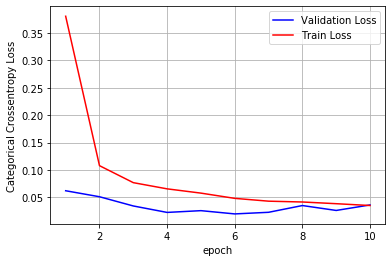

In [8]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoc
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 3. Summary

In [2]:
# To summarize the results:
# summary table in jupyter notebook
# http://zetcode.com/python/prettytable/
# https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook

from prettytable import PrettyTable
print("Epoch : 10 and Batch Size : 256")
x = PrettyTable()

x.field_names = ["Model","Convolution Layers","Kernel Size","Max pool","Padding","Batch Normalization","Dropout","Loss","Accuracy"]

x.add_row(["CNN", "3","3X3 for all","Yes","No","No","No",0.043,98.94])
x.add_row(["CNN", "3","3X3 for all","Yes","Yes","Yes","Yes",0.051,98.53])
x.add_row(["CNN", "5","5X5 for all","Yes","Yes","Yes","Yes",0.0154,99.51])
x.add_row(["CNN", "7","3X3 for 4th and 6th layer 2X2 for rest","Yes","Yes","Yes","Yes",0.0361,99.07])


print(x)

Epoch : 10 and Batch Size : 256
+-------+--------------------+----------------------------------------+----------+---------+---------------------+---------+--------+----------+
| Model | Convolution Layers |              Kernel Size               | Max pool | Padding | Batch Normalization | Dropout |  Loss  | Accuracy |
+-------+--------------------+----------------------------------------+----------+---------+---------------------+---------+--------+----------+
|  CNN  |         3          |              3X3 for all               |   Yes    |    No   |          No         |    No   | 0.043  |  98.94   |
|  CNN  |         3          |              3X3 for all               |   Yes    |   Yes   |         Yes         |   Yes   | 0.051  |  98.53   |
|  CNN  |         5          |              5X5 for all               |   Yes    |   Yes   |         Yes         |   Yes   | 0.0154 |  99.51   |
|  CNN  |         7          | 3X3 for 4th and 6th layer 2X2 for rest |   Yes    |   Yes   |      